In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive/BTL_TTNT'

'Face Images'   face_recognition.ipynb	 __MACOSX   Untitled0.ipynb


In [ ]:
TrainingImagePath='/content/drive/My Drive/BTL_TTNT/Face Images/Final Training Images'

from keras.preprocessing.image import ImageDataGenerator

# xác định train_data
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# tạo Training Data 
test_datagen = ImageDataGenerator() # tăng ảnh lên
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# tạo Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# các labels cho từng mặt
test_set.class_indices


Found 244 images belonging to 16 classes.
Found 244 images belonging to 16 classes.


{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

In [1]:
training_set.next()

NameError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 64, 64, 3)


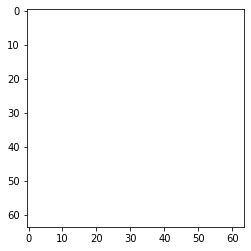

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 64, 64, 3)


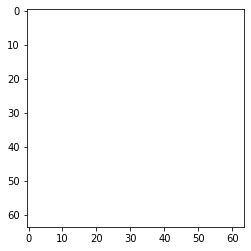

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 64, 64, 3)


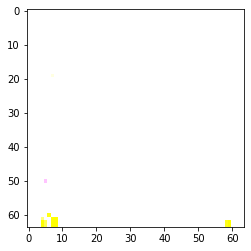

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 64, 64, 3)


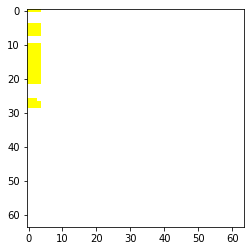

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 64, 64, 3)


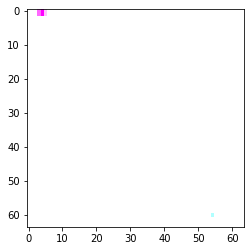

In [ ]:
import matplotlib.pyplot as plt

for _ in range(5):
    img, label = training_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [ ]:
# tạo map cho id và face name

#class_indices gắn thẻ số cho mỗi khuôn mặt
TrainClasses=training_set.class_indices
# lưu trữ khuôn mặt vào thẻ số 
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# model sẽ đưa ra câu trả lời dưới dạng thẻ số
# khi đó các mapping sẽ giúp ta lấy tên khuôn mặt tương ứng
print("Mapping of Face and ID",ResultMap)
# số lượng neurons đầu ra bằng số lượng khuôn mặt
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)


Mapping of Face and ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}

 The Number of output neurons:  16


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

'''CNN'''
classifier= Sequential()
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(OutputNeurons, activation='softmax'))
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])


import time
#thời gian train
StartTime=time.time()



# bắt đầu train model 
classifier.fit_generator(
                    training_set,
                    steps_per_epoch=7,
                    epochs=7,
                    validation_data=test_set,
                    validation_steps=10)

EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/7
7/7 [==============================] - 5s 685ms/step - loss: 150.1712 - accuracy: 0.0613 - val_loss: 20.8191 - val_accuracy: 0.0820
Epoch 2/7
7/7 [==============================] - 3s 391ms/step - loss: 7.0520 - accuracy: 0.0660
Epoch 3/7
7/7 [==============================] - 3s 386ms/step - loss: 2.8258 - accuracy: 0.0943
Epoch 4/7
7/7 [==============================] - 3s 399ms/step - loss: 2.7071 - accuracy: 0.1384
Epoch 5/7
7/7 [==============================] - 4s 498ms/step - loss: 2.5678 - accuracy: 0.1920
Epoch 6/7
7/7 [==============================] - 3s 408ms/step - loss: 2.3674 - accuracy: 0.1934
Epoch 7/7
7/7 [==============================] - 3s 388ms/step - loss: 2.2207 - accuracy: 0.2877
###### Total Time Taken:  1 Minutes ######


In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
# model VGG16
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, AveragePooling2D, Activation, ZeroPadding2D,Flatten,Input,Add,concatenate
from keras.models import Sequential,Model
input_shape=(224,224,3)
n_classes=16 #số nhãn
  
In=Input(shape=input_shape)
#block 1 starts here
x=Conv2D(64,(3,3),padding='same')(In)
x=Activation('relu')(x)
x=Conv2D(64,(3,3),padding='same')(x)
x=Activation('relu')(x)
x=MaxPool2D(pool_size=(3,3),strides=2,padding='same')(x)
#block 2 starts here
x=Conv2D(128,(3,3),padding='same')(x)
x=Activation('relu')(x)
x=Conv2D(128,(3,3),padding='same')(x)
x=Activation('relu')(x)
x=MaxPool2D(pool_size=(3,3),strides=2,padding='same')(x)

#block 3 starts here
x=Conv2D(256,(3,3),padding='same')(x)
x=Activation('relu')(x)
x=Conv2D(256,(3,3),padding='same')(x)
x=Activation('relu')(x)
x=MaxPool2D(pool_size=(3,3),strides=2,padding='same')(x)
    
#block 3 starts here
x=Conv2D(512,(3,3),padding='same')(x)
x=Activation('relu')(x)
x=Conv2D(512,(3,3),padding='same')(x)
x=Activation('relu')(x)
x=Conv2D(512,(3,3),padding='same')(x)
x=Activation('relu')(x)
x=MaxPool2D(pool_size=(3,3),strides=2,padding='same')(x)
    
#block 4 starts here
x=Conv2D(512,(3,3),padding='same')(x)
x=Activation('relu')(x)
x=Conv2D(512,(3,3),padding='same')(x)
x=Activation('relu')(x)
x=Conv2D(512,(3,3),padding='same')(x)
x=Activation('relu')(x)
x=MaxPool2D(pool_size=(3,3),strides=2,padding='same')(x)
    
#Flatten and fully connected layer start here
x=Flatten()(x)
x=Dense(units=25088,activation='relu')(x)
x=Dense(units=4096,activation='relu')(x)
x=Dense(units=4096,activation='relu')(x)
x=Dense(units=n_classes,activation='softmax')(x)
model=Model(In,x)

model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

import time
#thời gian train
StartTime=time.time()



# bắt đầu train model 
model.fit_generator(
                    training_set,
                    steps_per_epoch=7,
                    epochs=7,
                    validation_data=test_set,
                    validation_steps=10)

EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/7


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

import time
#thời gian train
StartTime=time.time()

# bắt đầu train model 
model.fit(training_set,steps_per_epoch=30,epochs=10,validation_data=test_set,validation_steps=10)

EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

Epoch 1/10


In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
base_model.summary()

dense = tf.keras.layers.Dense(16)(base_model[-4])

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

TypeError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras.models import Model
vgg_model =  tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze four convolution blocks
for layer in vgg_model.layers[:15]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(16, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)


from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)

checkpoint = tf.keras.callbacks.ModelCheckpoint('vgg16_finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

from tensorflow.keras import layers, models, Model, optimizers
learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])
history = transfer_model.fit_generator(training_set, epochs=7, shuffle=True, callbacks=[lr_reduce],verbose=1)

0 input_4 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/7
8/8 [==============================] - 114s 14s/step - loss: 13.3808 - accuracy: 0.0820 - lr: 5.0000e-05
Epoch 2/7
8/8 [==============================] - 117s 15s/step - loss: 4.3431 - accuracy: 0.1598 - lr: 5.0000e-05
Epoch 3/7
8/8 [==============================] - 110s 13s/step - loss: 3.1561 - accuracy: 0.1639 - lr: 5.0000e-05
Epoch 4/7
8/8 [==============================] - 109s 13s/step - loss: 2.4848 - accuracy: 0.2705 - lr: 5.0000e-05
Epoch 5/7
8/8 [==============================] - 109s 14s/step - loss: 1.8889 - accuracy: 0.3934 - lr: 5.0000e-05
Epoch 6/7
8/8 [==============================] - 108s 13s/step - loss: 1.6328 - accuracy: 0.5451 - lr: 5.0000e-05
Epoch 7/7
8/8 [==============================] - 110s 14s/step - loss: 1.3381 - accuracy: 0.5820 - lr: 5.0000e-05


In [ ]:
xx = transfer_model.predict(test_set)
tf.math.argmax(xx[0])

<tf.Tensor: shape=(), dtype=int64, numpy=2>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 224, 224, 3)


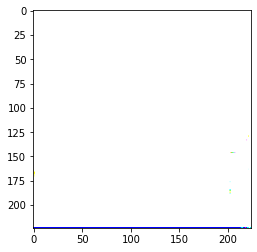

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 224, 224, 3)


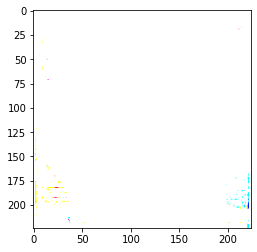

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 224, 224, 3)


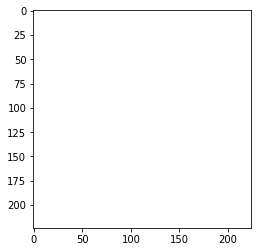

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 224, 224, 3)


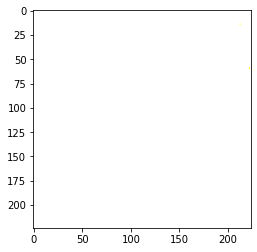

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 224, 224, 3)


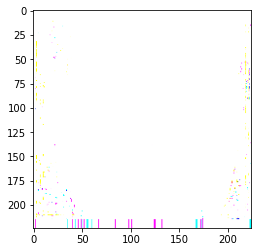